# Torsion elastique

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [2]:
def load(filename: str):
    return pd.read_csv(filename)

In [3]:
laiton = load('../data/laiton_torsion_vs_longueur.csv')
acier = load('../data/acier_torsion_vs_longueur.csv')
magnesium = load('../data/magnesium_torsion_vs_longueur.csv')

In [4]:
def fit_line(data):
    longueur = unp.uarray(data["Longueur [cm]"], delta_regle_tige)
    start = unp.uarray(data["Start [cm]"], delta_regle_laser)
    stop = unp.uarray(data["Stop [cm]"], delta_regle_laser)
    deviation = stop - start

    theta = 0.5 * unp.arctan(deviation / distance_regle)
    coefs, cov = np.polyfit(nom_vals(longueur), nom_vals(theta), 1, cov=True)
    coefs_err = unp.uarray(coefs, np.sqrt(np.diag(cov)))
    fit_func = np.poly1d(coefs)
    return coefs_err, fit_func


In [8]:
def plot_data(data, **kwargs):
    longueur = unp.uarray(data["Longueur [cm]"], delta_regle_tige)
    start = unp.uarray(data["Start [cm]"], delta_regle_laser)
    stop = unp.uarray(data["Stop [cm]"], delta_regle_laser)
    deviation = stop - start

    theta = 0.5 * unp.arctan(deviation / distance_regle)

    plt.errorbar(nom_vals(longueur), nom_vals(theta), ls='none', yerr=std_devs(theta), **kwargs)

In [9]:
def plot_and_print_fit(data, **kwargs):
    coefs_err, fit_func = fit_line(data)
    print(f"Pente: {coefs_err[0]:.2ueP} ({coefs_err[0]:.2ueL})")
    longueur = unp.uarray(data["Longueur [cm]"], delta_regle_tige)
    c = plt.gca().lines[-1].get_color()
    plt.plot(nom_vals(longueur), fit_func(nom_vals(longueur)), '--', c=c, label='$y = ({:.1ueL})x + ({:.1ueL})$'.format(*coefs_err), **kwargs)


Laiton (masse = 622 g)
Pente: (1.472±0.025)×10⁻³ (\left(1.472 \pm 0.025\right) \times 10^{-3})
Acier (masse = 622 g)
Pente: (5.96±0.20)×10⁻⁴ (\left(5.96 \pm 0.20\right) \times 10^{-4})
Magnesium (masse = 622 g)
Pente: (1.30±0.21)×10⁻⁴ (\left(1.30 \pm 0.21\right) \times 10^{-4})


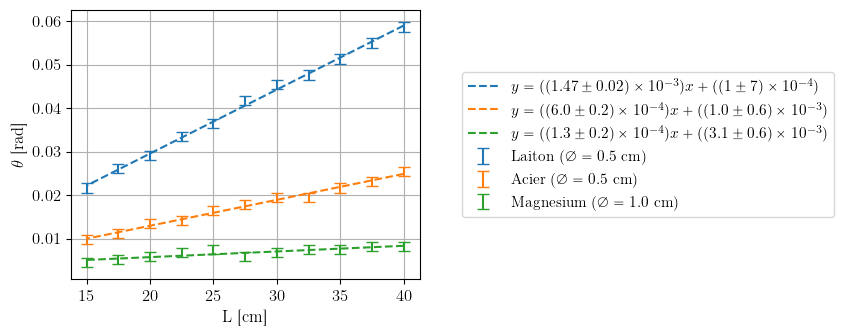

In [10]:
print(f'Laiton (masse = {laiton["Masse [g]"][0]:.0f} g)')
plot_data(laiton, label=f'Laiton ($\\diameter={epaisseur_tige_laiton.n:.1f}$ \\si{{\\centi\\meter}})')
plot_and_print_fit(laiton)
print(f'Acier (masse = {acier["Masse [g]"][0]:.0f} g)')
plot_data(acier, label=f'Acier ($\\diameter={epaisseur_tige_acier.n:.1f}$ \\si{{\\centi\\meter}})')
plot_and_print_fit(acier)
print(f'Magnesium (masse = {magnesium["Masse [g]"][0]:.0f} g)')
plot_data(magnesium, label=f'Magnesium ($\\diameter={epaisseur_tige_magnesium.n:.1f}$ \\si{{\\centi\\meter}})')
plot_and_print_fit(magnesium)
plt.xlabel(r'L [\si{\centi\meter}]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
plt.grid()
plt.savefig('../figures/methode_statique_longueur.pdf')